## Customer Chrun Prediction of Bank**

### Exploratory Data Analysis(EDA)**



**IMPORT LIBARIES**



In [1]:
#Libaries imported
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

**LOAD DATASET**



In [2]:
#load the dataset 
df=pd.read_csv('//content/Bank.csv')

In [3]:
#its show the 1st five row of the dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Its shows the last five rows of the dataset
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**INFORMATION OF DATASET**:-


In [5]:
#Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**COLUMN NAMES OF DATASET**

In [6]:
col_names=df.columns
print("The Names of the Columns is \n",col_names)

The Names of the Columns is 
 Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


**DATATYPES OF COLUMNS**

In [7]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [8]:
df.dtypes.value_counts()

int64      8
object     2
float64    2
dtype: int64

there are 10 numerical and 2 categorical Data

**SHAPE OF DATASET**

In [9]:
leng=len(df)
print('The lenght of dataset is ',leng)

The lenght of dataset is  10000


In [10]:
df.shape

(10000, 12)

In [11]:
print('Number of Rows in Dataset',df.shape[0])
print('Number of columns in dataset',df.shape[1])

Number of Rows in Dataset 10000
Number of columns in dataset 12


**MISSING VALUE IMPUTATION**


In [12]:
#checking for the null values
df.isnull().sum()/len(df)

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

There is no missing Values


In [13]:
df["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

#**Data Visulaization**
##**Graphical Representation**

**CATEGORICAL FEATURES GRAPHICAL REPRESENTATION**

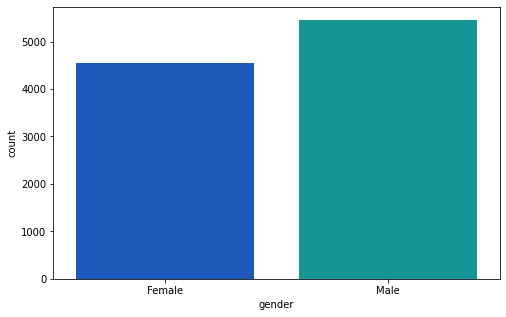

In [14]:
#For Gender
plt.figure(figsize=(8,5))
sns.countplot('gender', data=df, palette='winter')
plt.show()

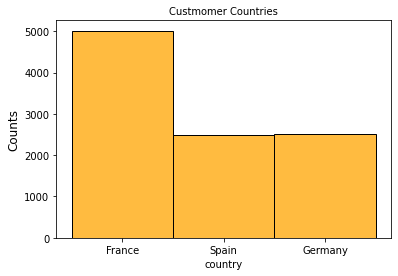

In [15]:
#Cusotmer from the different contries
sns.histplot(df['country'],color='orange')
plt.title('Custmomer Countries', fontsize=10)
plt.ylabel('Counts', fontsize=12)
plt.show()

**Pie Chart Representation**

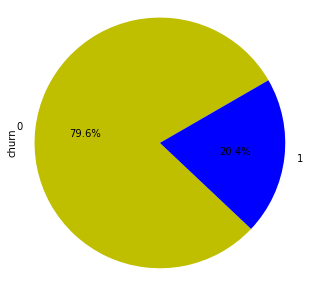

In [16]:
#pie chart of the Target column of dataset
df["churn"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(5,5),startangle=30,colors = ['y','b'])
plt.axis("equal")
plt.show()

**GRAPHICAL REPRESENTAION OF THE NUMERIC FEATURES IN THE DATASET**

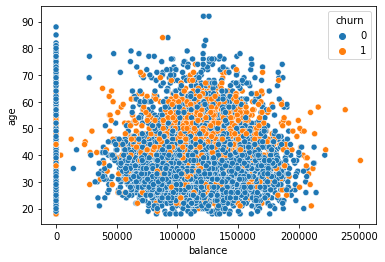

In [17]:
#scatter plot of Age of customer to Balacne of the customer
sns.scatterplot(x=df['balance'],y=df['age'],hue=df['churn'])
plt.show()

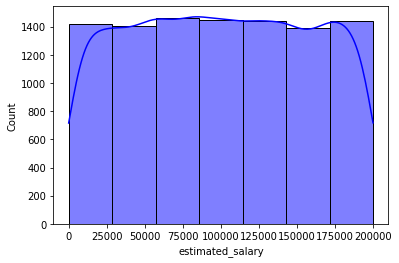

In [18]:
#Estimated Salry of Customers
plt.figure()
sns.histplot(data=df, x="estimated_salary", bins=7,kde=True,color='blue')
plt.show()

## Data Preprocessing**


**LABEL ENCONDING**



In [19]:
#do label enconder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
le = LabelEncoder()
df['churn']=le.fit_transform(df['churn'])

**DROPING THE TARGETED COLUMN**

In [20]:
#Drop the taste column
X=df.drop(columns=['churn'])
y=df['churn'].values
y

array([1, 0, 1, ..., 1, 1, 0])

**ONE HOT ENCONDING**



In [21]:
#get dumnies of the X
X=pd.get_dummies(X)

**DATA SPLITTNG**

Split the data into two datas 

1.   Train data
2.   Test data



In [22]:
# Spliting the  the train and test data 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**STANDARDIZATION**


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

##**Model Implementation**

**FUNCTION OF EVALUATION OF METRICS**



In [24]:
# function for evaluation metrics precision, recall, f1 etc
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)*100))    
    print ("\nOutput: \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

**K-Nearest Neighbour(KNN)**

========== K-Nearest Neighbour Classifier ==========

Accuracy on validation set: 77.3333

Output: 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      3067
           1       0.10      0.27      0.15       233

    accuracy                           0.77      3300
   macro avg       0.52      0.54      0.51      3300
weighted avg       0.88      0.77      0.82      3300


Confusion Matrix : 
 [[2488  579]
 [ 169   64]]


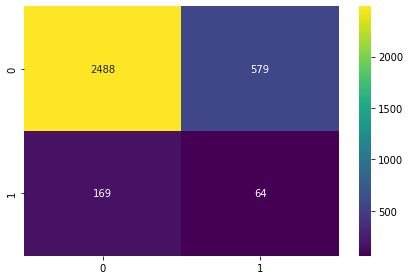

In [25]:
#import the KNN from the Sklearn 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results_knn = modelEvaluation(y_test, y_pred_knn, "K-Nearest Neighbour Classifier")

**LOGISTIC REGRESSION (LR)**

========== logistic Regression ==========

Accuracy on validation set: 80.5152

Output: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89      3300
           1       0.00      0.00      0.00         0

    accuracy                           0.81      3300
   macro avg       0.50      0.40      0.45      3300
weighted avg       1.00      0.81      0.89      3300


Confusion Matrix : 
 [[2657  643]
 [   0    0]]


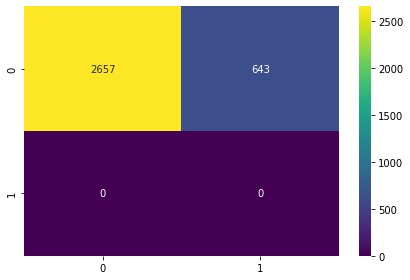

In [26]:
#logistic regression model form the sklearn lib
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results_lr = modelEvaluation(y_test, y_pred_lr, "logistic Regression")

**RANDOM FOREST CLASSIFIER (RFC)**

========== Random Forest Classifier ==========

Accuracy on validation set: 86.8182

Output: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      2910
           1       0.47      0.77      0.58       390

    accuracy                           0.87      3300
   macro avg       0.72      0.82      0.75      3300
weighted avg       0.91      0.87      0.88      3300


Confusion Matrix : 
 [[2566  344]
 [  91  299]]


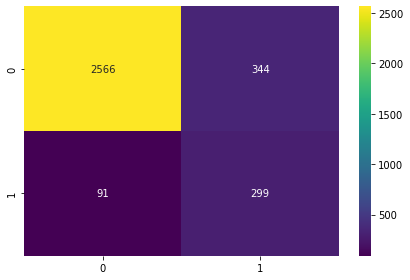

In [27]:
#import the RFC from the Sklearn 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
results_rfc = modelEvaluation(y_test, y_pred_rfc, "Random Forest Classifier")

**PLOTTING ACCURACIES OF THE MODELS IMPLEMENTED**

In [28]:
#accuracies of the model we implemented above
accuracies=[['RFC',86.89],['LR',80.512],['KNN',77.33]]
scores=pd.DataFrame(accuracies,columns=['model','accuracy'])

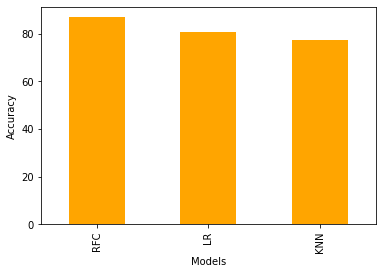

In [29]:
#accuracy ploted
scores.set_index('model').accuracy.plot(kind='bar',color='orange')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

The best machine learning model is **RandomForestClassifier(RFC)** with accuracy of **87**

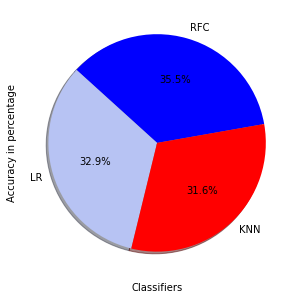

In [30]:
#Percetage of ploted models 
scores.set_index('model').accuracy.plot(kind='pie',autopct="%1.1f%%",figsize=(5,5),shadow=True, startangle=10,colors = ['b','#B7C3F3','r','g'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy in percentage')
plt.show()